In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/Users/harishkumar/Downloads/combats.csv')
df.tail()

,First_pokemon,Second_pokemon,Winner
49995,707,126,707
49996,589,664,589
49997,303,368,368
49998,109,89,109
49999,9,73,9


In [3]:
df.isnull().sum()

First_pokemon     0
Second_pokemon    0
Winner            0
dtype: int64

In [4]:
pok=pd.read_csv('/Users/harishkumar/Downloads/pokemon.csv')
pok.rename(columns = {'#':'id'}, inplace = True) 
pok.tail()

,id,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
795,796,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
796,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True
799,800,Volcanion,Fire,Water,80,110,120,130,90,70,6,True


In [5]:
pok.isnull().sum()

id              0
Name            1
Type 1          0
Type 2        386
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [6]:
for i in range(len(df)):
    if(df.loc[i, "Winner"]==df.loc[i, "First_pokemon"]):
        df.loc[i,'Loser']=df.loc[i, "Second_pokemon"]
    else:
        df.loc[i,'Loser']=df.loc[i, "First_pokemon"]

In [7]:
wins = df.Winner.value_counts()
grpwins = df.groupby('Winner').count()
countfirst = df.groupby('Second_pokemon').count()
countsecond = df.groupby('First_pokemon').count()

In [8]:
find_losing_pokemon= np.setdiff1d(countfirst.index.values, grpwins.index.values)-1 #offset because the index and number are off by one
losing_pokemon = pok.iloc[find_losing_pokemon[0],]
print(losing_pokemon)

id                231
Name          Shuckle
Type 1            Bug
Type 2           Rock
HP                 20
Attack             10
Defense           230
Sp. Atk            10
Sp. Def           230
Speed               5
Generation          2
Legendary       False
Name: 230, dtype: object


In [11]:
df1 = df['First_pokemon'].value_counts().rename_axis('id').to_frame('counts1')
df1=df1.sort_index()
df1

,counts1
id,
1,70
2,55
3,68
4,62
5,50
...,...
796,49
797,64
798,60


In [12]:
df2 = df['Second_pokemon'].value_counts().rename_axis('id').to_frame('counts2')
df2=df2.sort_index()
df2

,counts2
id,
1,63
2,66
3,64
4,63
5,62
...,...
796,56
797,67
798,59


In [13]:
df4 = df['Winner'].value_counts().rename_axis('id').to_frame('wins')
df4=df4.sort_index()
df4

,wins
id,
1,37
2,46
3,89
4,70
5,55
...,...
796,39
797,116
798,60


In [14]:
df3=result = pd.merge(df1, df2, on='id')
df3['tot']=df3['counts1']+df3['counts2']
final=result = pd.merge(df3, df4, on='id')
final

,counts1,counts2,tot,wins
id,,,,
1,70,63,133,37
2,55,66,121,46
3,68,64,132,89
4,62,63,125,70
5,50,62,112,55
...,...,...,...,...
796,49,56,105,39
797,64,67,131,116
798,60,59,119,60


In [15]:
final['win_per']=final['wins']/final['tot']
final

,counts1,counts2,tot,wins,win_per
id,,,,,
1,70,63,133,37,0.278195
2,55,66,121,46,0.380165
3,68,64,132,89,0.674242
4,62,63,125,70,0.560000
5,50,62,112,55,0.491071
...,...,...,...,...,...
796,49,56,105,39,0.371429
797,64,67,131,116,0.885496
798,60,59,119,60,0.504202


In [16]:
high=final.nlargest(10, ['win_per'])
high

,counts1,counts2,tot,wins,win_per
id,,,,,
155,66,63,129,127,0.984496
513,72,47,119,116,0.974790
704,57,68,125,121,0.968000
20,72,47,119,115,0.966387
154,65,76,141,136,0.964539
477,63,66,129,124,0.961240
727,62,65,127,122,0.960630
717,64,59,123,118,0.959350
165,54,71,125,119,0.952000


In [37]:
res = pd.merge(high, pok, on='id')
 
res

,id,counts1,counts2,tot,wins,win_per,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,155,66,63,129,127,0.984496,Mega Aerodactyl,Rock,Flying,80,135,85,70,95,150,1,False
1,513,72,47,119,116,0.974790,Weavile,Dark,Ice,70,120,65,45,85,125,4,False
2,704,57,68,125,121,0.968000,Tornadus Therian Forme,Flying,NaN,79,100,80,110,90,121,5,True
3,20,72,47,119,115,0.966387,Mega Beedrill,Bug,Poison,65,150,40,15,80,145,1,False
4,154,65,76,141,136,0.964539,Aerodactyl,Rock,Flying,80,105,65,60,75,130,1,False
5,477,63,66,129,124,0.961240,Mega Lopunny,Normal,Fighting,65,136,94,54,96,135,4,False
6,727,62,65,127,122,0.960630,Greninja,Water,Dark,72,95,67,103,71,122,6,False
7,717,64,59,123,118,0.959350,Meloetta Pirouette Forme,Normal,Fighting,100,128,90,77,77,128,5,False
8,165,54,71,125,119,0.952000,Mega Mewtwo Y,Psychic,NaN,106,150,70,194,120,140,1,True
9,350,50,70,120,114,0.950000,Mega Sharpedo,Water,Dark,70,140,70,110,65,105,3,False


In [38]:
small=final.nsmallest(10, ['win_per'])
small

,counts1,counts2,tot,wins,win_per
id,,,,,
290,67,71,138,3,0.021739
190,58,64,122,3,0.024590
639,73,56,129,4,0.031008
237,59,64,123,4,0.032520
577,62,66,128,5,0.039062
189,59,56,115,5,0.043478
395,60,70,130,6,0.046154
210,58,67,125,6,0.048000
292,69,64,133,7,0.052632


In [49]:
res = pd.merge(small, pok, on='id')
 
res

,id,counts1,counts2,tot,wins,win_per,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,290,67,71,138,3,0.021739,Silcoon,Bug,NaN,50,35,55,25,25,15,3,False
1,190,58,64,122,3,0.024590,Togepi,Fairy,NaN,35,20,65,40,65,20,2,False
2,639,73,56,129,4,0.031008,Solosis,Psychic,NaN,45,30,40,105,50,20,5,False
3,237,59,64,123,4,0.032520,Slugma,Fire,NaN,40,40,40,70,40,20,2,False
4,577,62,66,128,5,0.039062,Munna,Psychic,NaN,76,25,45,67,55,24,5,False
5,189,59,56,115,5,0.043478,Igglybuff,Normal,Fairy,90,30,15,40,20,15,2,False
6,395,60,70,130,6,0.046154,Wynaut,Psychic,NaN,95,23,48,23,48,23,3,False
7,210,58,67,125,6,0.048000,Wooper,Water,Ground,55,45,45,25,25,15,2,False
8,292,69,64,133,7,0.052632,Cascoon,Bug,NaN,50,35,55,25,25,15,3,False
9,753,63,70,133,8,0.060150,Spritzee,Fairy,NaN,78,52,60,63,65,23,6,False


In [52]:
res = pd.merge(pok,final, on='id')
typ = res.groupby('Type 1') 
typ['win_per'].mean()

Type 1
Bug         0.439006
Dark        0.629726
Dragon      0.633587
Electric    0.632861
Fairy       0.329300
Fighting    0.475616
Fire        0.579215
Flying      0.765061
Ghost       0.484027
Grass       0.440364
Ground      0.541526
Ice         0.439604
Normal      0.535578
Poison      0.433262
Psychic     0.545747
Rock        0.404852
Steel       0.424529
Water       0.469357
Name: win_per, dtype: float64

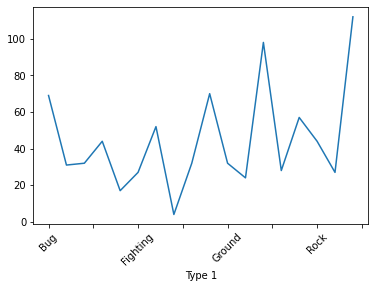

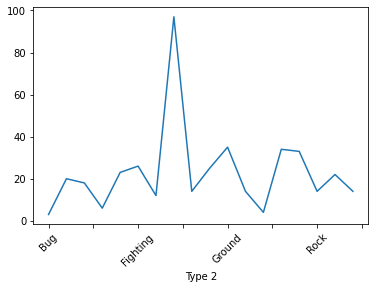

In [87]:
dia = pok.groupby(['Type 1']).count()['id']
dia.plot() 
plt.xticks(rotation=45) 
plt.show()
dia2 = pok.groupby(['Type 2']).count()['id']
dia2.plot() 
plt.xticks(rotation=45) 
plt.show()

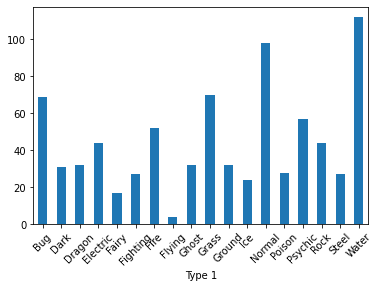

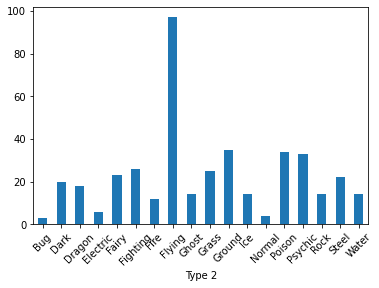

In [74]:
dia = pok.groupby(['Type 1']).count()['id']
dia.plot.bar() 
plt.xticks(rotation=45) 
plt.show()
dia2 = pok.groupby(['Type 2']).count()['id']
dia2.plot.bar() 
plt.xticks(rotation=45) 
plt.show()

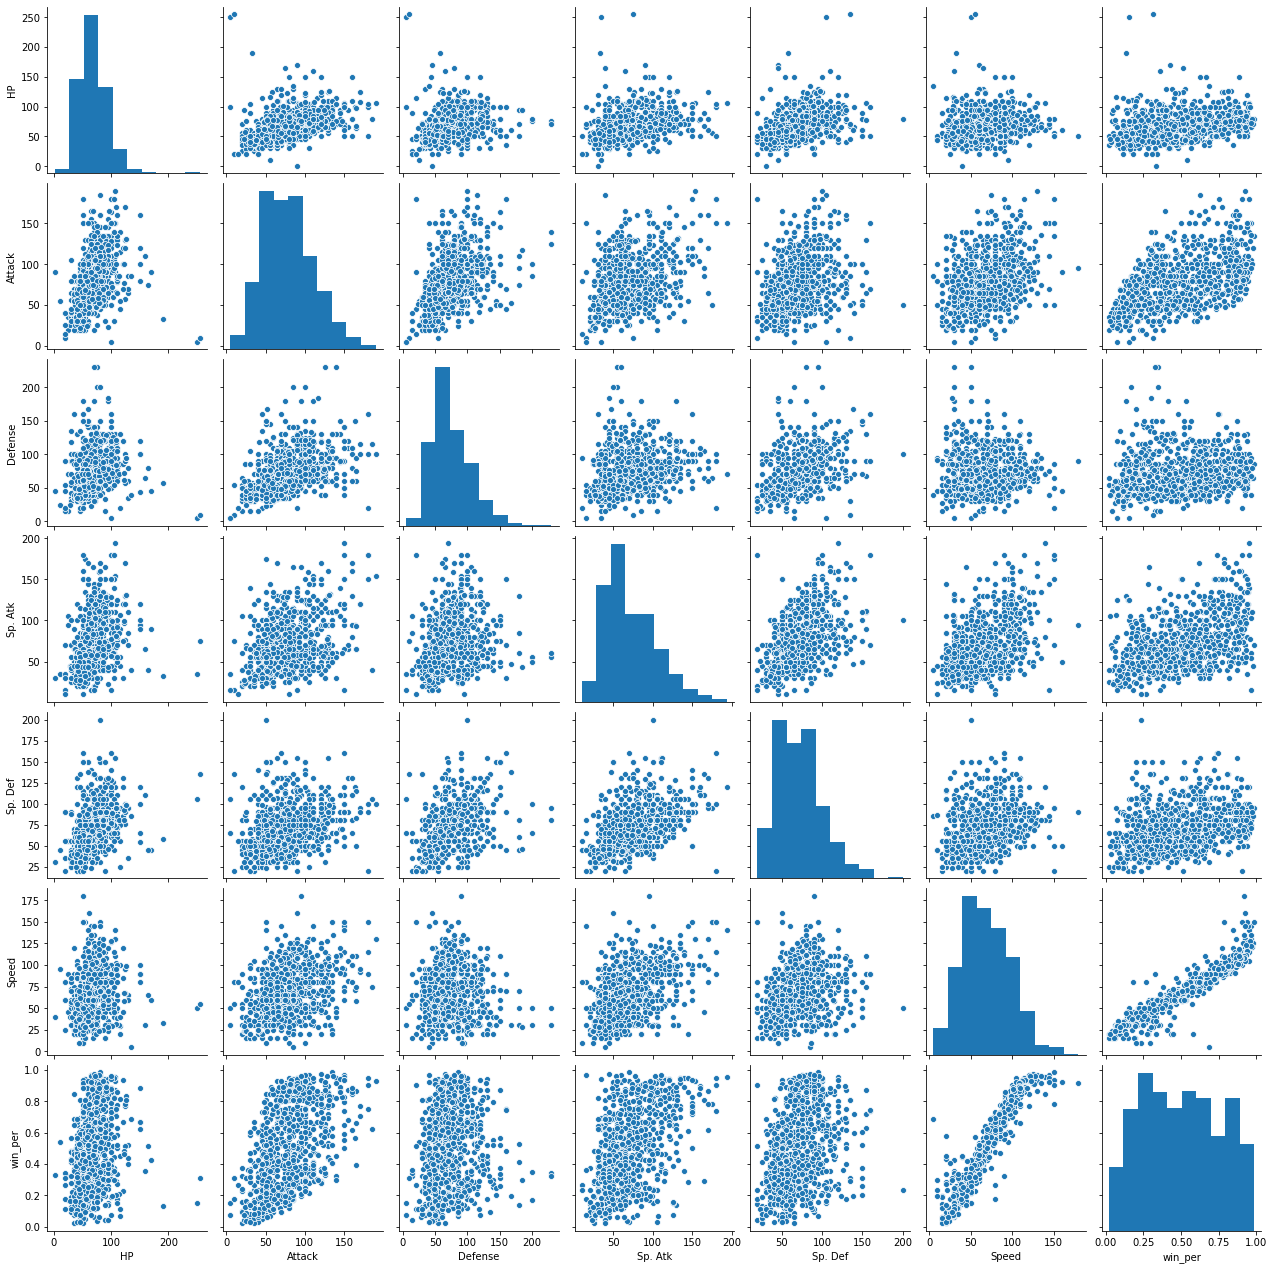

In [83]:
typ = pd.merge(pok, final, left_on='id', right_index = True, how='left')
col = ['Type 1','HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'win_per']
sns.pairplot(typ.loc[:,col].dropna())

In [94]:
corr=typ.loc[:,col].corr()

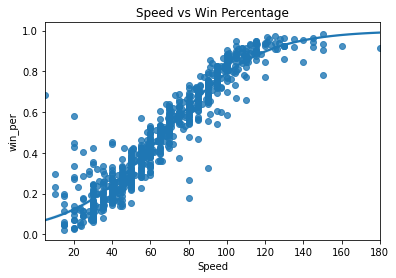

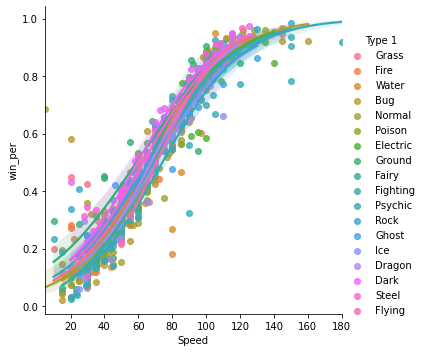

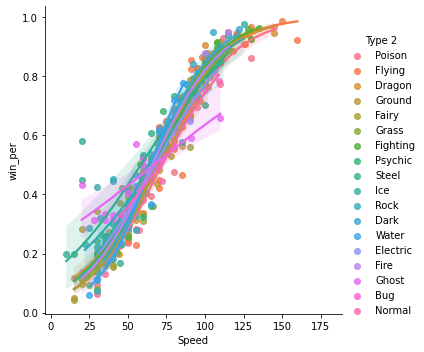

In [86]:
sns.regplot(x="Speed", y="win_per", data=typ, logistic=True).set_title("Speed vs Win Percentage")
sns.lmplot(x="Speed", y="win_per", data=typ, hue = 'Type 1',  logistic=True)
sns.lmplot(x="Speed", y="win_per", data=typ, hue = 'Type 2',  logistic=True)

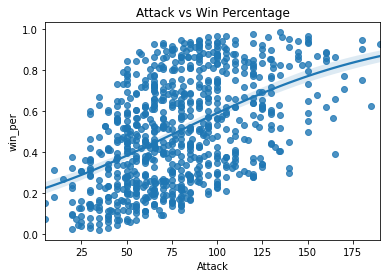

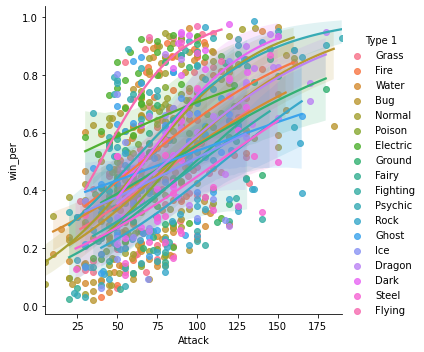

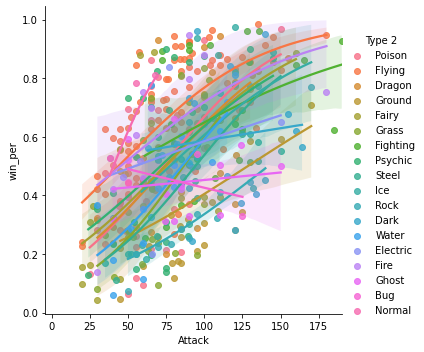

In [91]:
sns.regplot(x="Attack", y="win_per", data=typ, logistic=True).set_title("Attack vs Win Percentage")
sns.lmplot(x="Attack", y="win_per", data=typ, hue = 'Type 1',  logistic=True)
sns.lmplot(x="Attack", y="win_per", data=typ, hue = 'Type 2',  logistic=True)

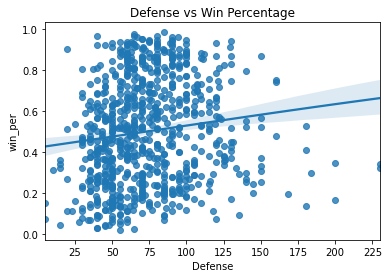

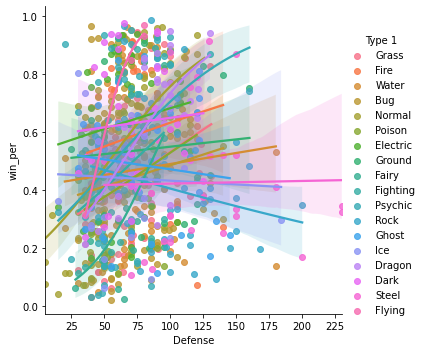

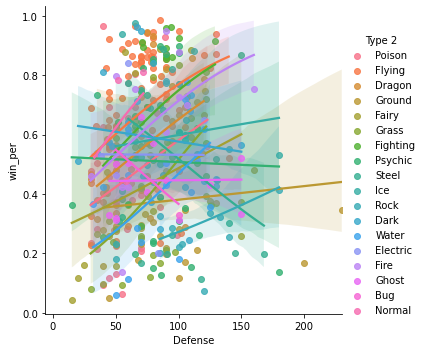

In [90]:
sns.regplot(x="Defense", y="win_per", data=typ, logistic=True).set_title("Defense vs Win Percentage")
sns.lmplot(x="Defense", y="win_per", data=typ, hue = 'Type 1',  logistic=True)
sns.lmplot(x="Defense", y="win_per", data=typ, hue = 'Type 2',  logistic=True)

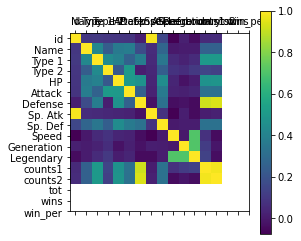

In [93]:
plt.matshow(typ.corr())
plt.xticks(range(len(typ.columns)), typ.columns)
plt.yticks(range(len(typ.columns)), typ.columns)
plt.colorbar()
plt.show()

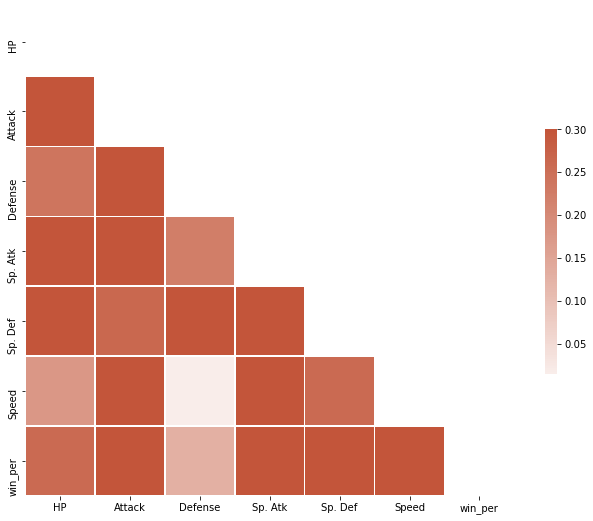

In [95]:
 mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

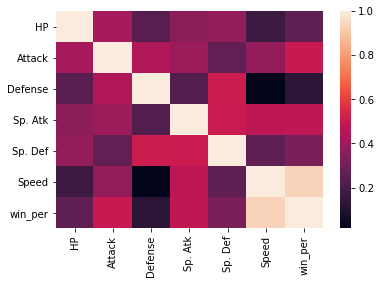

In [96]:
sns.heatmap(corr)